# 📦 Customer Reviews Sentiment Insights using VADER

Analyze Amazon product reviews to extract sentiment, enrich data, and visualize in Power BI.


In [ ]:
pip install nltk


## 🧠 Initialize VADER sentiment analyzer

We’ll use NLTK’s built-in SentimentIntensityAnalyzer to get sentiment scores.


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

## 📥 Load dataset

Read customer reviews CSV into a pandas DataFrame.
We’ll check column names and remove any missing review texts.


In [ ]:
import kagglehub
import os
path = kagglehub.dataset_download("datafiniti/consumer-reviews-of-amazon-products")
print("Path to dataset files:", path)
print("Files downloaded:", os.listdir(path))
filename = os.path.join(path, "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df = pd.read_csv(filename, encoding='utf-8')
print("✅ Loaded dataset successfully!")

Path to dataset files: /kaggle/input/consumer-reviews-of-amazon-products
Files downloaded: ['Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv', '1429_1.csv', 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv']
✅ Loaded dataset successfully!


In [ ]:
df.head()


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [ ]:
df.isnull().sum()

,0
id,0
dateAdded,0
dateUpdated,0
name,0
asins,0
brand,0
categories,0
primaryCategories,0
imageURLs,0
keys,0


In [ ]:
df.fillna(0, inplace=True)
df.isnull().sum()

,0
id,0
dateAdded,0
dateUpdated,0
name,0
asins,0
brand,0
categories,0
primaryCategories,0
imageURLs,0
keys,0


## 📊 Apply VADER sentiment analysis

Compute sentiment scores for each review.
VADER returns four scores: `neg`, `neu`, `pos`, and `compound` (overall sentiment).


In [ ]:
sia = SentimentIntensityAnalyzer()
df['vader_scores'] = df['reviews.text'].apply(lambda x: sia.polarity_scores(str(x)))

## 🗂 Split VADER scores into columns

Extract `compound`, `pos`, `neu`, and `neg` into separate DataFrame columns for easier analysis.


In [ ]:
# Expand scores into separate columns
df = pd.concat([df.drop(['vader_scores'], axis=1), df['vader_scores'].apply(pd.Series)], axis=1)


## 🏷 Label reviews as positive, neutral, or negative

Based on the `compound` score:
- ≥ 0.05 → positive
- ≤ -0.05 → negative
- else → neutral


In [ ]:

def label_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['compound'].apply(label_sentiment)

print(df[['reviews.text', 'compound', 'sentiment_label']].head())



                                        reviews.text  compound sentiment_label
0  I order 3 of them and one of the item is bad q...   -0.6908        negative
1  Bulk is always the less expensive way to go fo...    0.3612        positive
2  Well they are not Duracell but for the price i...    0.7650        positive
3  Seem to work as well as name brand batteries a...    0.6124        positive
4  These batteries are very long lasting the pric...    0.6249        positive


## 📊 Visualize sentiment distribution

Plot number of positive, neutral, and negative reviews to see the overall sentiment balance.


/tmp/ipython-input-11-91972595.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='coolwarm')


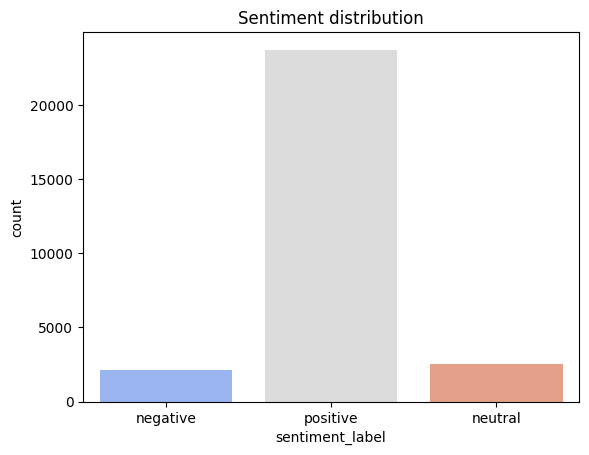

In [ ]:
sns.countplot(x='sentiment_label', data=df, palette='coolwarm')
plt.title('Sentiment distribution')
plt.show()


## 💾 Export enriched data to CSV

Save final dataset with sentiment scores and labels to use in Power BI dashboards.


In [ ]:
from google.colab import files

#downloading for dashboard craetion
df.to_csv('customer_reviews_with_vader_sentiment.csv', index=False)
files.download('customer_reviews_with_vader_sentiment.csv')

print("✅ Done! Results saved to customer_reviews_with_vader_sentiment.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Done! Results saved to customer_reviews_with_vader_sentiment.csv


## ✅ Summary

We built a complete pipeline:
- Loaded reviews
- Analyzed sentiment with VADER
- Enriched data with sentiment labels
- Saved to CSV for visualization

Next step: Build Power BI dashboard with sentiment trends, product insights, and KPIs.
